# **_3 Pandas 모듈과 패키지_**
**금융데이터를 활용한 파이썬 기초**

언의의 내용과 개념을 있는 그대로 받아들이고 이해하려고 노력하자

<br>
## **1 Pandas  &nbsp;&nbsp; & &nbsp;&nbsp; Numpy**
- **numpy** : 엑셀의 내부 함수 모음 ( pandas의 메소드 함수역활)
- **pandas** : 엑셀의 단축키 , sheets 등 부가기능 모음
- 함께 뒤 섞여서 활용
<br>
</br><img src = "http://pbpython.com/images/pandas-dataframe-shadow.png" align="left" width='800'>

<br>
## **2 'Series'  in Pandas**

<br>
### **01 [ list ] 와 비교**

In [1]:
lists = [4,2,-1,1,-2,-3,4,5]
lists

[4, 2, -1, 1, -2, -3, 4, 5]

In [2]:
import pandas as pd
data = pd.Series(lists)
data

0    4
1    2
2   -1
3    1
4   -2
5   -3
6    4
7    5
dtype: int64

In [3]:
data.index

RangeIndex(start=0, stop=8, step=1)

In [4]:
data.values

array([ 4,  2, -1,  1, -2, -3,  4,  5])

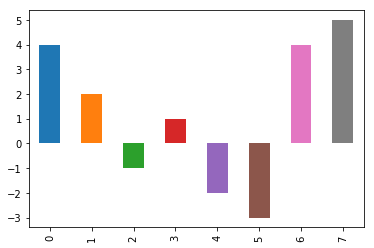

In [5]:
%matplotlib inline
data.plot(kind='bar')

<br>
### ** 02 { dict } 와 비교**

In [6]:
dict_data = {'seoul':4, 'dajun':7, 'daegu':-5, 'busan':3}
pd.Series(dict_data)

busan    3
daegu   -5
dajun    7
seoul    4
dtype: int64

In [7]:
data = pd.Series([4, 7, -5, 3], 
                 index = ['seoul', 'dajun', 'daegu','busan'])
data

seoul    4
dajun    7
daegu   -5
busan    3
dtype: int64

In [8]:
data.index

Index(['seoul', 'dajun', 'daegu', 'busan'], dtype='object')

In [9]:
data['seoul']

4

<br>
### **03 Series 의 함수적 속성**

In [10]:
data * 2

seoul     8
dajun    14
daegu   -10
busan     6
dtype: int64

In [11]:
data [ data > 5 ]

dajun    7
dtype: int64

In [12]:
data.isnull()

seoul    False
dajun    False
daegu    False
busan    False
dtype: bool

In [13]:
data2 = pd.Series([-4, 3, -5], 
                  index = ['dajun', 'daegu','busan'])
data + data2

busan   -2.0
daegu   -2.0
dajun    3.0
seoul    NaN
dtype: float64

In [14]:
data2.index = [1,2,3]
data2

1   -4
2    3
3   -5
dtype: int64

<br>
## **3 'DataFrame'  in Pandas** 
<br><br></br>
### **01 Table 생성**

In [15]:
import pandas as pd
pd.DataFrame(data)

,0
seoul,4
dajun,7
daegu,-5
busan,3


In [16]:
data3 = [10,9,8,7,6,5,7]
df = pd.DataFrame( {'first_col' : data, 
                    'second_col': data2, 
                    'third_col' : data3} )
df

/home/markbaum/Python/python/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


<br>
### **02 Index**

In [17]:
df = df.reset_index()
df

,index,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,NaN,8
3,busan,3.0,NaN,7
4,1,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [18]:
df = df.rename(columns={'index':'city'})
df

,city,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,NaN,8
3,busan,3.0,NaN,7
4,1,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [19]:
df = df.set_index('city')
df

,first_col,second_col,third_col
city,,,
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


In [20]:
df.drop('busan', axis = 0)

,first_col,second_col,third_col
city,,,
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
1,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


In [21]:
df_index    = df.index.tolist()
df_index[4] = 'Jeju'
df_index

['seoul', 'dajun', 'daegu', 'busan', 'Jeju', 2, 3]

In [22]:
df.index = df_index
df

,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,NaN,8
busan,3.0,NaN,7
Jeju,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


<br>
### **03 Columns**
DataFrame 의 Columns 바꾸기 및 재정렬

In [23]:
df.second_col['daegu'] = 7
df

/home/markbaum/Python/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,first_col,second_col,third_col
seoul,4.0,NaN,10
dajun,7.0,NaN,9
daegu,-5.0,7.0,8
busan,3.0,NaN,7
Jeju,NaN,-4.0,6
2,NaN,3.0,5
3,NaN,-5.0,7


In [24]:
df = df.reset_index()
df.rename(columns={ 'level_0'   : '도시명',
                   'first_col'  : '보건소',
                   'second_col' : '경찰서', 
                   'third_col'  : '도서관'})

,index,보건소,경찰서,도서관
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [25]:
rename = ['index', '도시명', 'index', '보건소', '경찰서', '도서관']
result = {}
{ col : rename[no]     for no, col in enumerate(df.columns)}

{'index': 'index',
 'first_col': '도시명',
 'second_col': 'index',
 'third_col': '보건소'}

In [26]:
df.rename(columns = result)

,index,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [27]:
df['Year'] = '2018'
df

,index,first_col,second_col,third_col,Year
0,seoul,4.0,NaN,10,2018
1,dajun,7.0,NaN,9,2018
2,daegu,-5.0,7.0,8,2018
3,busan,3.0,NaN,7,2018
4,Jeju,NaN,-4.0,6,2018
5,2,NaN,3.0,5,2018
6,3,NaN,-5.0,7,2018


In [28]:
df = df.drop('Year', axis = 1)
df

,index,first_col,second_col,third_col
0,seoul,4.0,NaN,10
1,dajun,7.0,NaN,9
2,daegu,-5.0,7.0,8
3,busan,3.0,NaN,7
4,Jeju,NaN,-4.0,6
5,2,NaN,3.0,5
6,3,NaN,-5.0,7


In [29]:
df.insert(0, 'Year', '2018')
df

,Year,index,first_col,second_col,third_col
0,2018,seoul,4.0,NaN,10
1,2018,dajun,7.0,NaN,9
2,2018,daegu,-5.0,7.0,8
3,2018,busan,3.0,NaN,7
4,2018,Jeju,NaN,-4.0,6
5,2018,2,NaN,3.0,5
6,2018,3,NaN,-5.0,7


In [30]:
df.insert(1,'month', '04')
df

,Year,month,index,first_col,second_col,third_col
0,2018,04,seoul,4.0,NaN,10
1,2018,04,dajun,7.0,NaN,9
2,2018,04,daegu,-5.0,7.0,8
3,2018,04,busan,3.0,NaN,7
4,2018,04,Jeju,NaN,-4.0,6
5,2018,04,2,NaN,3.0,5
6,2018,04,3,NaN,-5.0,7


<br>
### **04 Sorting**

In [31]:
df.sort_index(axis = 0, ascending=False)

,Year,month,index,first_col,second_col,third_col
6,2018,04,3,NaN,-5.0,7
5,2018,04,2,NaN,3.0,5
4,2018,04,Jeju,NaN,-4.0,6
3,2018,04,busan,3.0,NaN,7
2,2018,04,daegu,-5.0,7.0,8
1,2018,04,dajun,7.0,NaN,9
0,2018,04,seoul,4.0,NaN,10


In [32]:
df.sort_values(by='third_col')

,Year,month,index,first_col,second_col,third_col
5,2018,04,2,NaN,3.0,5
4,2018,04,Jeju,NaN,-4.0,6
3,2018,04,busan,3.0,NaN,7
6,2018,04,3,NaN,-5.0,7
2,2018,04,daegu,-5.0,7.0,8
1,2018,04,dajun,7.0,NaN,9
0,2018,04,seoul,4.0,NaN,10


<br>
### **05 Series 를 활용한 시계열 데이터 다루기**

In [33]:
import pandas as pd
date_list = pd.date_range('2017-7-1','2017-7-7')
date_list

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07'],
              dtype='datetime64[ns]', freq='D')

In [34]:
[ str(date)  for date in date_list ]

['2017-07-01 00:00:00',
 '2017-07-02 00:00:00',
 '2017-07-03 00:00:00',
 '2017-07-04 00:00:00',
 '2017-07-05 00:00:00',
 '2017-07-06 00:00:00',
 '2017-07-07 00:00:00']

In [35]:
[ ts.date() for ts in date_list ]

[datetime.date(2017, 7, 1),
 datetime.date(2017, 7, 2),
 datetime.date(2017, 7, 3),
 datetime.date(2017, 7, 4),
 datetime.date(2017, 7, 5),
 datetime.date(2017, 7, 6),
 datetime.date(2017, 7, 7)]

In [36]:
date_list = [ str(ts.date()) for ts in date_list ]
date_list

['2017-07-01',
 '2017-07-02',
 '2017-07-03',
 '2017-07-04',
 '2017-07-05',
 '2017-07-06',
 '2017-07-07']

In [37]:
df.insert(0,'Date',date_list)
df

,Date,Year,month,index,first_col,second_col,third_col
0,2017-07-01,2018,04,seoul,4.0,NaN,10
1,2017-07-02,2018,04,dajun,7.0,NaN,9
2,2017-07-03,2018,04,daegu,-5.0,7.0,8
3,2017-07-04,2018,04,busan,3.0,NaN,7
4,2017-07-05,2018,04,Jeju,NaN,-4.0,6
5,2017-07-06,2018,04,2,NaN,3.0,5
6,2017-07-07,2018,04,3,NaN,-5.0,7


In [38]:
pd.DataFrame({'Data':[1,2,3,4,5],
             'Qusetion':['A','B','C','D','E'],
             'Answer':['X', 'Y', 'Z','Q','P']})

,Answer,Data,Qusetion
0,X,1,A
1,Y,2,B
2,Z,3,C
3,Q,4,D
4,P,5,E


<br>
## **4 Numpy  &nbsp; with &nbsp; pandas Series & DataFrame**
<br>
### **01 ndarray : 다차원 array**

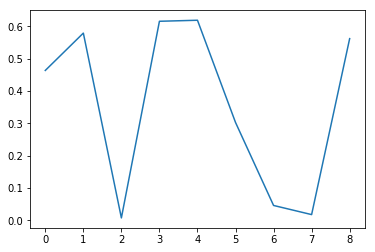

In [39]:
import pandas as pd
import numpy as np

data = np.random.rand(9)
data = pd.Series(data)
data.plot()

In [40]:
ndarray_data = np.random.rand(30).reshape(6,5)
print(type(ndarray_data), '\n', ndarray_data)

<class 'numpy.ndarray'> 
 [[0.39215682 0.3419772  0.08406906 0.63508644 0.58449541]
 [0.99042541 0.20080784 0.60822424 0.58749013 0.87169532]
 [0.18291984 0.26177794 0.14967258 0.83350371 0.24834958]
 [0.31889143 0.07114319 0.70510976 0.22759617 0.6122572 ]
 [0.85279598 0.67949333 0.29288122 0.7035513  0.46174517]
 [0.22779455 0.87359054 0.8956522  0.76811027 0.7594705 ]]


In [41]:
df = pd.DataFrame(ndarray_data,
             columns=['Kospi','Kosdq','MSFT','Nasdaq','China'],
             index = ['2012','2013','2014','2015','2016','2017'])
df

,Kospi,Kosdq,MSFT,Nasdaq,China
2012,0.392157,0.341977,0.084069,0.635086,0.584495
2013,0.990425,0.200808,0.608224,0.587490,0.871695
2014,0.182920,0.261778,0.149673,0.833504,0.248350
2015,0.318891,0.071143,0.705110,0.227596,0.612257
2016,0.852796,0.679493,0.292881,0.703551,0.461745
2017,0.227795,0.873591,0.895652,0.768110,0.759471


In [42]:
df.columns

Index(['Kospi', 'Kosdq', 'MSFT', 'Nasdaq', 'China'], dtype='object')

In [43]:
df.columns.tolist()

['Kospi', 'Kosdq', 'MSFT', 'Nasdaq', 'China']

In [44]:
df.index

Index(['2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

In [45]:
df.index.tolist()

['2012', '2013', '2014', '2015', '2016', '2017']

<br>
### **02 DataFrame 의 컬럼 데이터 인덱싱**
DataFrame ==> **Series**

In [46]:
df.Kosdq

2012    0.341977
2013    0.200808
2014    0.261778
2015    0.071143
2016    0.679493
2017    0.873591
Name: Kosdq, dtype: float64

In [47]:
df['Kospi']

2012    0.392157
2013    0.990425
2014    0.182920
2015    0.318891
2016    0.852796
2017    0.227795
Name: Kospi, dtype: float64

<br>
### **03 DataFrame 의 Row 데이터 인덱싱**
DataFrame 부분 편집하기

In [48]:
df[:3]

,Kospi,Kosdq,MSFT,Nasdaq,China
2012,0.392157,0.341977,0.084069,0.635086,0.584495
2013,0.990425,0.200808,0.608224,0.587490,0.871695
2014,0.182920,0.261778,0.149673,0.833504,0.248350


<br>
### **04 DataFrame 의 [Row : column]  데이터 인덱싱**

In [49]:
df.iloc[ : , : ]

,Kospi,Kosdq,MSFT,Nasdaq,China
2012,0.392157,0.341977,0.084069,0.635086,0.584495
2013,0.990425,0.200808,0.608224,0.587490,0.871695
2014,0.182920,0.261778,0.149673,0.833504,0.248350
2015,0.318891,0.071143,0.705110,0.227596,0.612257
2016,0.852796,0.679493,0.292881,0.703551,0.461745
2017,0.227795,0.873591,0.895652,0.768110,0.759471


In [50]:
df.iloc[:, :3]

,Kospi,Kosdq,MSFT
2012,0.392157,0.341977,0.084069
2013,0.990425,0.200808,0.608224
2014,0.182920,0.261778,0.149673
2015,0.318891,0.071143,0.705110
2016,0.852796,0.679493,0.292881
2017,0.227795,0.873591,0.895652


In [51]:
df_sum = df.iloc[3:, :3]
df_sum

,Kospi,Kosdq,MSFT
2015,0.318891,0.071143,0.705110
2016,0.852796,0.679493,0.292881
2017,0.227795,0.873591,0.895652
